In [47]:
import numpy as np #numbers
import pandas as pd #load and manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization


In [48]:
df=pd.read_csv("/content/loan_prediction (1).csv")

In [49]:
df.shape

(614, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [52]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


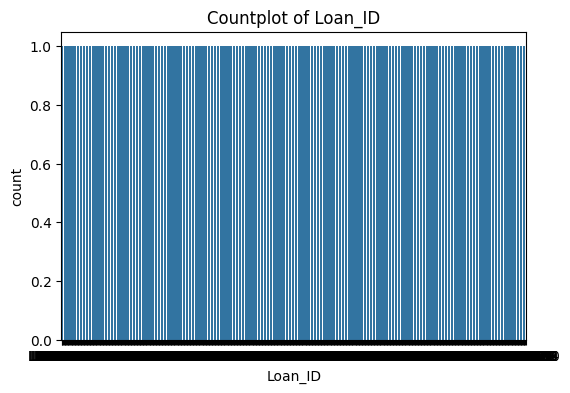

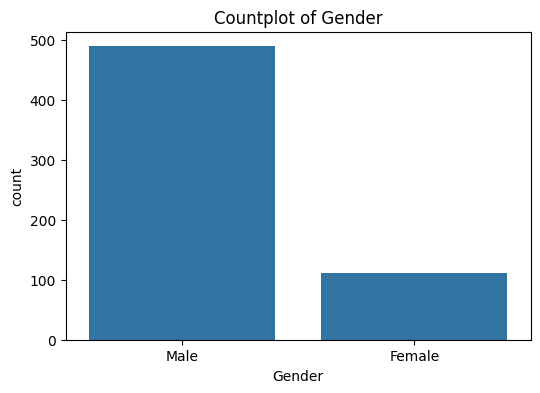

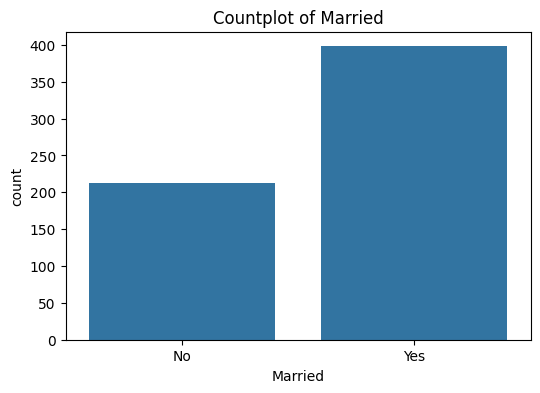

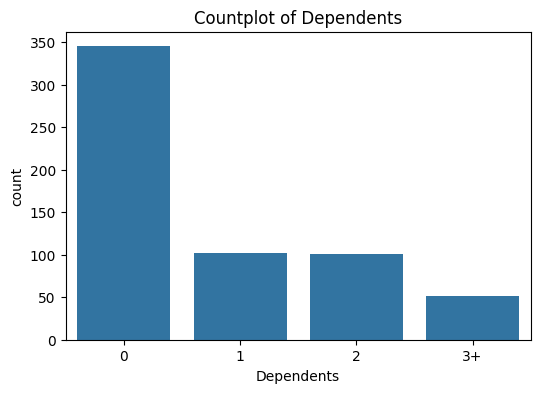

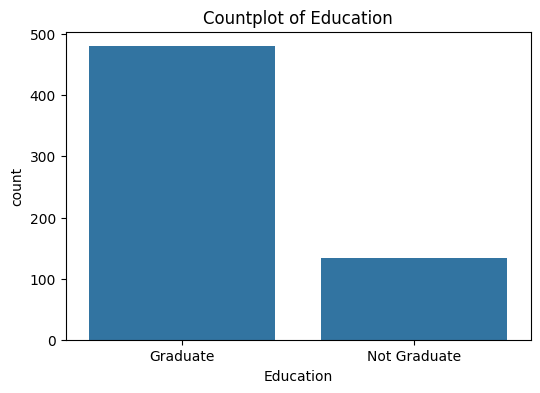

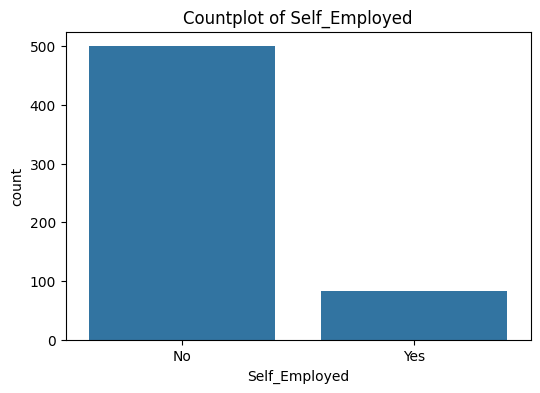

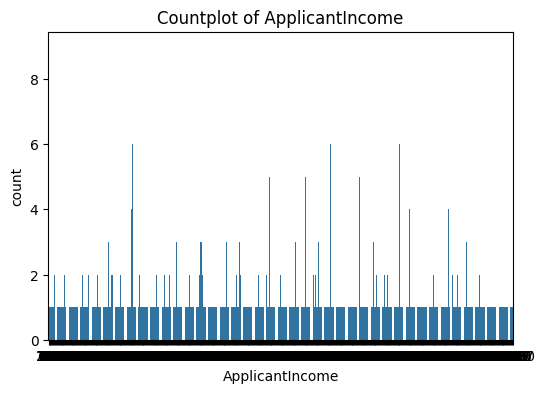

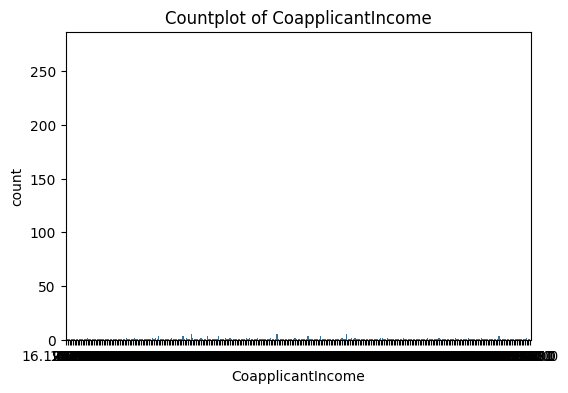

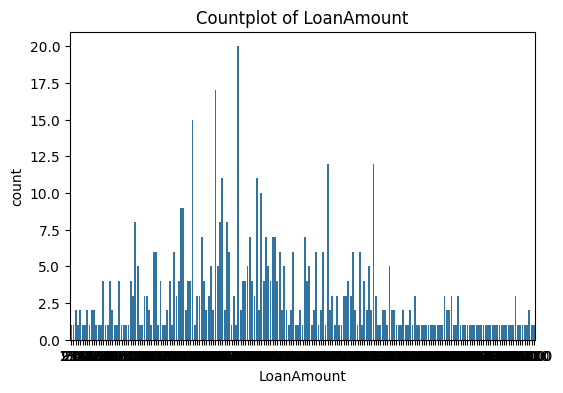

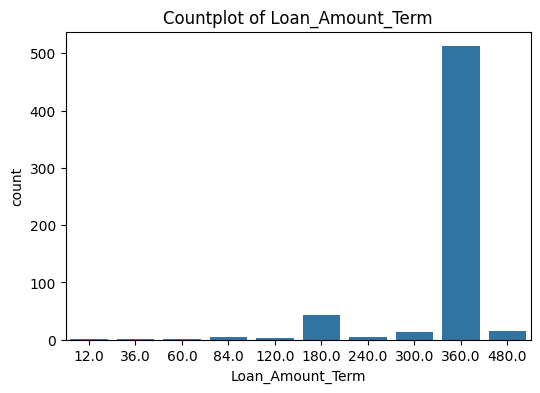

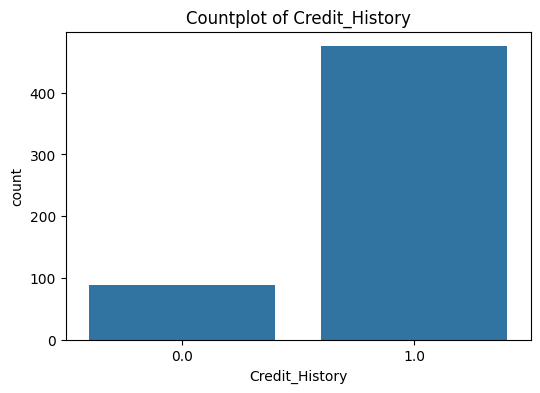

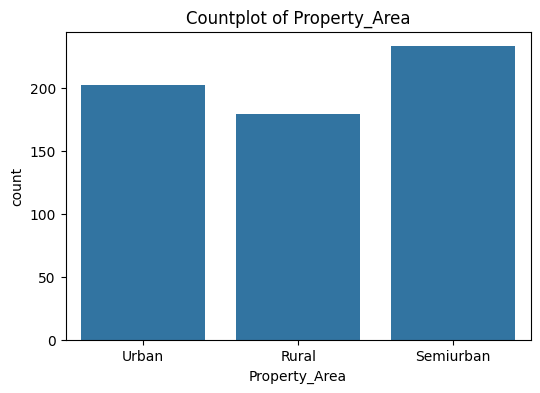

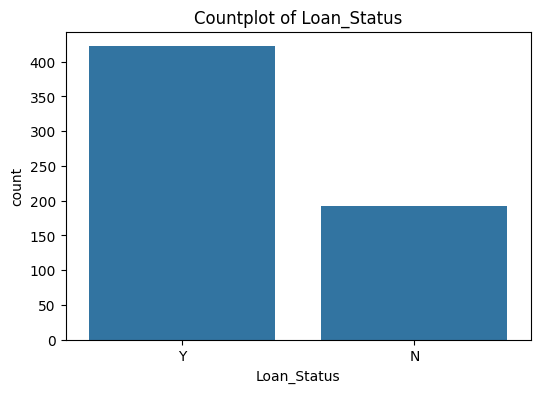

In [53]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

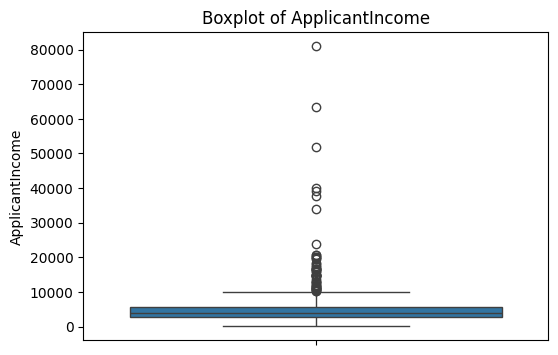

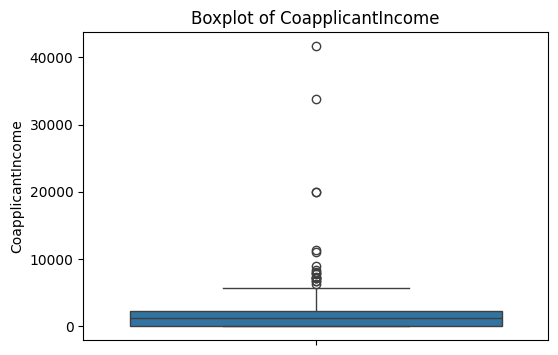

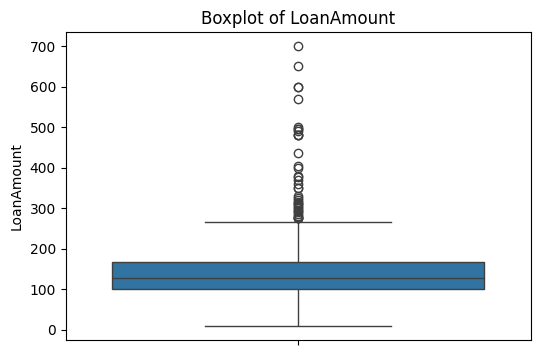

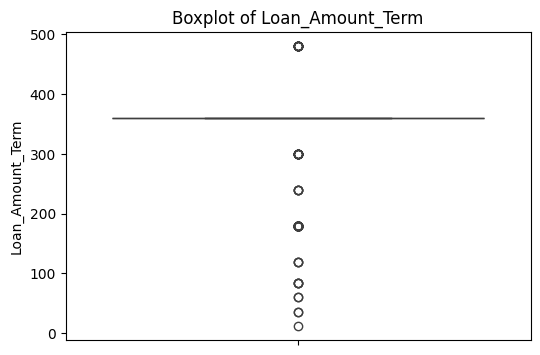

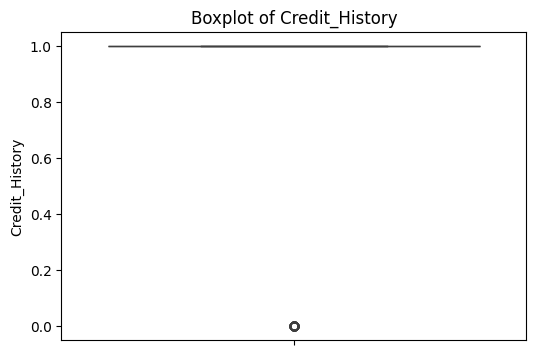

In [54]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])   # y for vertical orientation
    plt.title(f'Boxplot of {col}')
    plt.show()

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

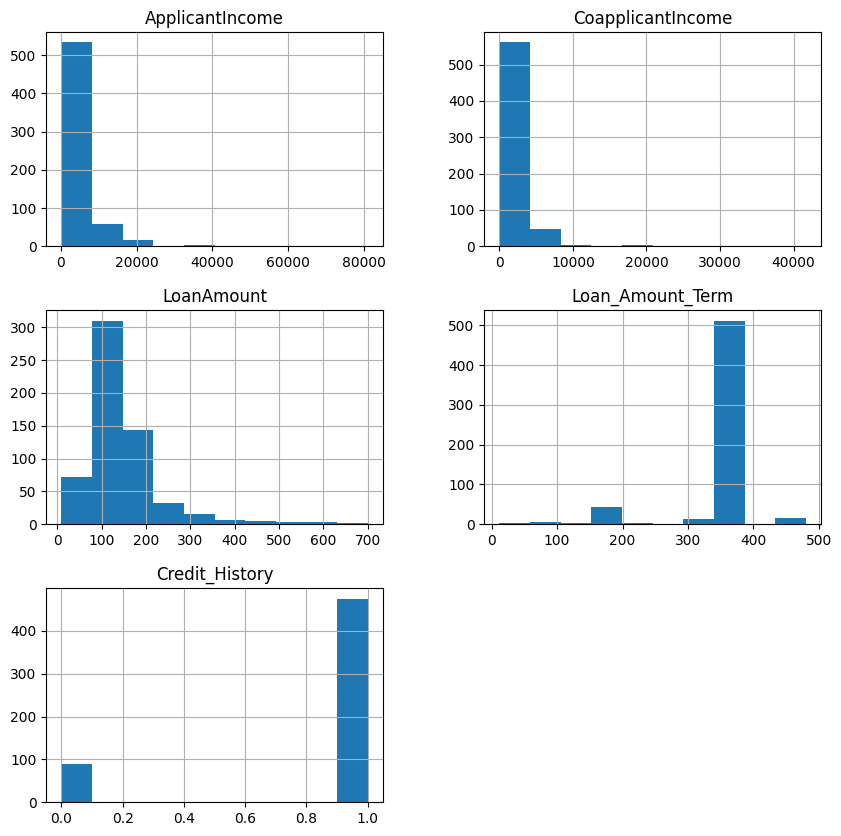

In [55]:
df.hist(figsize=(10,10))

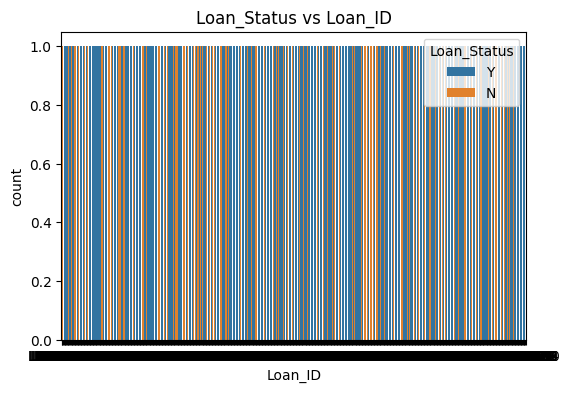

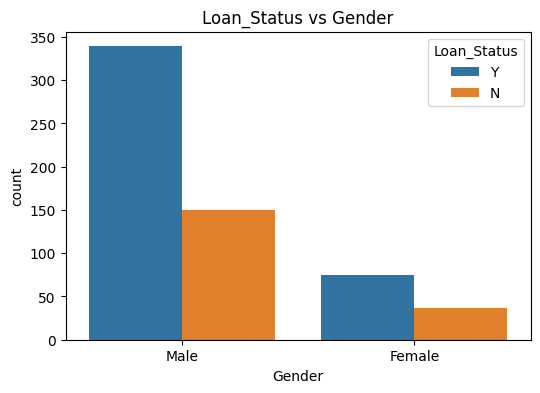

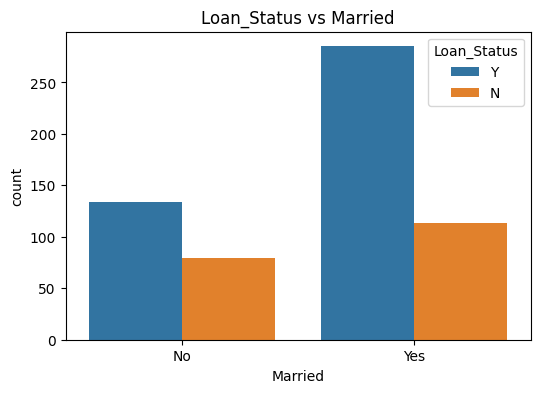

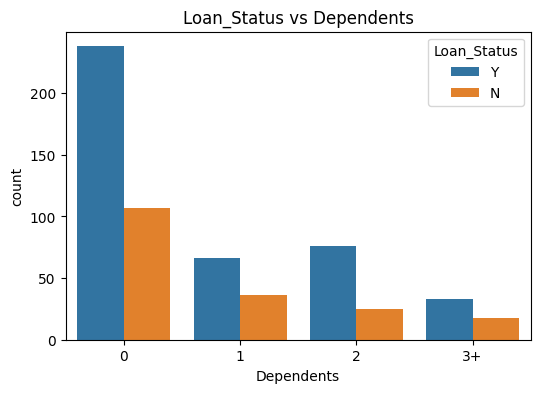

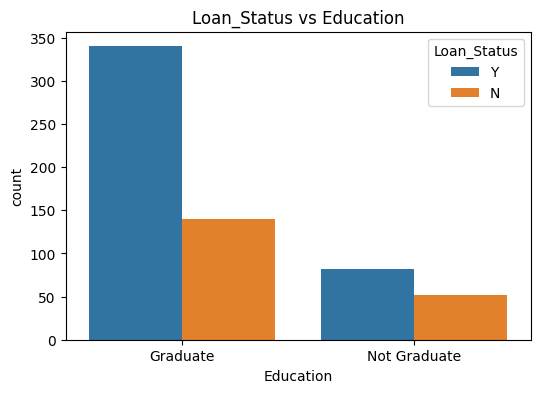

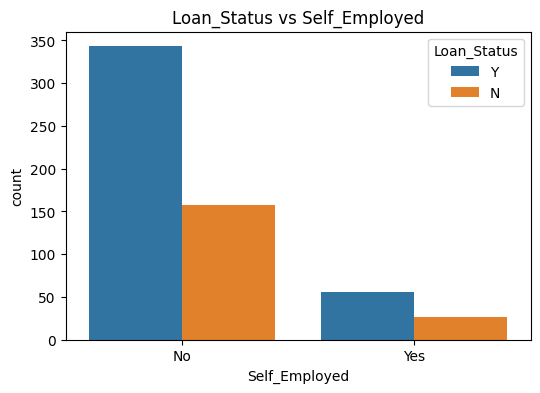

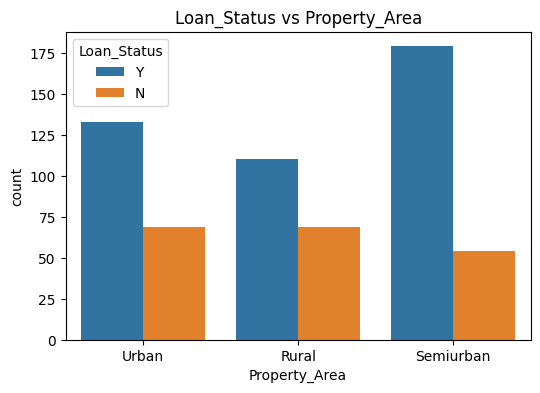

In [56]:
categorical_cols = df.select_dtypes(include='object').columns.drop('Loan_Status')

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df['Loan_Status'])
    plt.title(f'Loan_Status vs {col}')
    plt.show()

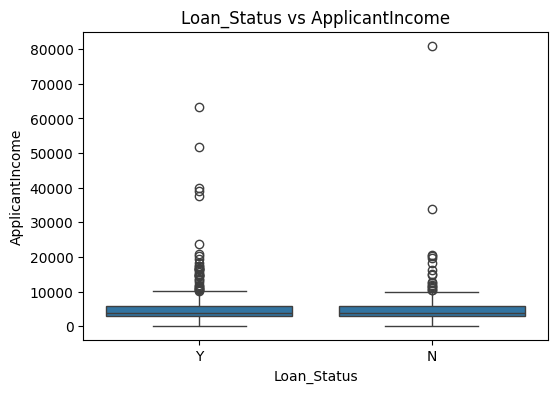

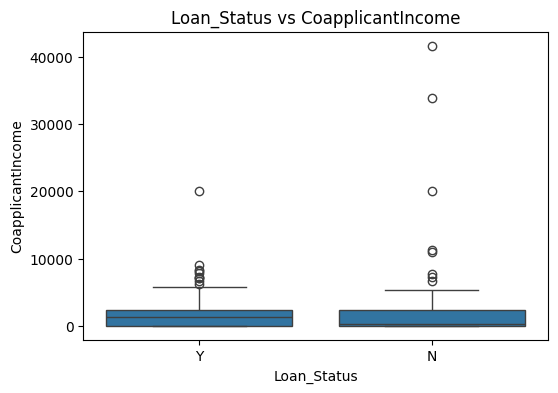

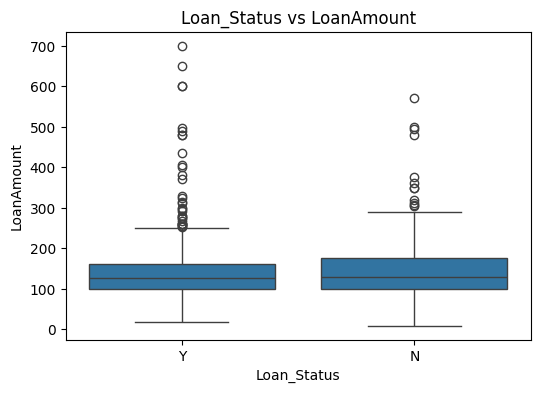

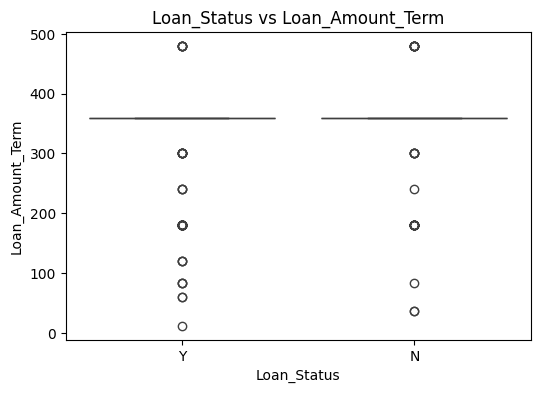

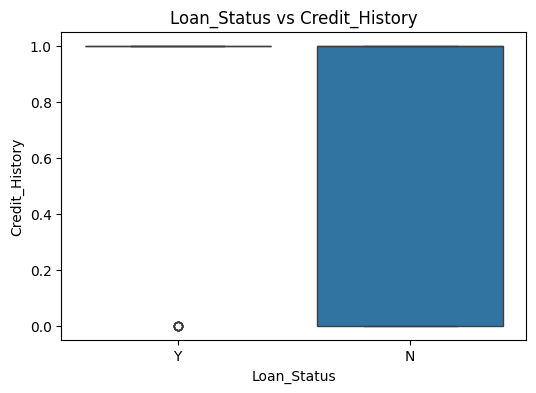

In [57]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Loan_Status'], y=df[col])
    plt.title(f'Loan_Status vs {col}')
    plt.show()

In [58]:
### Data Preparation

In [59]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [60]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [61]:
med_loanamount=df["LoanAmount"].median()
med_loanamount

128.0

In [62]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,med_loanamount)

In [63]:
### Replace for loanamount term and credit history

In [64]:
med_term=df["Loan_Amount_Term"].median()
med_term

360.0

In [65]:
med_credit=df["Credit_History"].median()
med_credit

1.0

In [66]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,med_credit)

In [67]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,med_term)

In [68]:
mode_gender=df["Gender"].mode()[0]
mode_gender

'Male'

In [69]:
df["Gender"]=df["Gender"].replace(np.nan,mode_gender)

In [70]:
### Married,dependents,selfemployed

In [71]:
mode_married=df["Married"].mode()[0]
mode_married

'Yes'

In [72]:
df["Married"]=df["Married"].replace(np.nan,mode_married)

In [73]:
mode_dep=df["Dependents"].mode()[0]
mode_dep

'0'

In [74]:
df["Dependents"]=df["Dependents"].replace(np.nan,mode_dep)

In [75]:
mode_emp=df["Self_Employed"].mode()[0]
mode_emp

'No'

In [76]:
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode_emp)

In [77]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [78]:
### No Missing values
### No categorical columns
### Insignificant columns

In [79]:
df=df.drop("Loan_ID",axis=1) #axis=1 rep colm axis=0 rep row

In [80]:
df.shape

(614, 12)

In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
object_cols = df.select_dtypes(include=['object']).columns

# Encode each object-type column
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [84]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [85]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
